In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

# seller_name = ["seller_id", "breed", "good_id", "good_stock",
#                "depot_id", "brand", "place", "year", "level", "category"]
# buyer_name = ["buyer_id", "hold_time", "buy_count", "breed", "expect1", "value1",
#               "expect2", "value2", "expect3", "value3", "expect4", "value4", "expect5", "value5"]

df_seller = pd.read_csv("./seller.txt", header=0, low_memory=False, dtype=np.str)
df_buyer = pd.read_csv("./buyer.txt", header=0, low_memory=False, dtype=np.str)
df_seller.fillna(value='null', inplace=True)
df_buyer.fillna(value='null', inplace=True)
df_seller[['货物数量（张）']] = df_seller[['货物数量（张）']].values.astype(int)
df_buyer[['平均持仓时间', '购买货物数量']] = df_buyer[['平均持仓时间', '购买货物数量']].values.astype(int)

In [2]:
df_seller.head()

,卖方客户,品种,货物编号,货物数量（张）,仓库,品牌,产地,年度,等级,类别
0,999900000001,CF,CF2020011104087,8,314,null,新疆,2020,1230A,S1U2P3
1,999900000001,CF,CF2020011103822,1,335,null,新疆,2020,1228C,S2U3P2
2,999900000002,CF,CF2020011108737,2,309,null,非新疆,2020,2228A,S2U3P2
3,999900000002,CF,CF2020011101610,6,325,null,新疆,2020,4128C,S3U2P3
4,999900000002,CF,CF2020011104593,2,332,null,新疆,2020,4128C,S1U3P2


In [16]:
tmp = df_seller[df_seller["产地"]=="新疆"]
# tmp = tmp.groupby("货物编号").agg({'货物数量（张）': {'sum', 'count'}})
tmp.groupby("仓库").agg({'货物数量（张）': {'sum', 'count'}}).sort_values(by=("货物数量（张）", "sum"))
tmp.groupby("年度").agg({'货物数量（张）': {'sum', 'count'}}).sort_values(by=("货物数量（张）", "sum"))
tmp.groupby("等级").agg({'货物数量（张）': {'sum', 'count'}}).sort_values(by=("货物数量（张）", "sum"))
# tmp.groupby("类别").agg({'货物数量（张）': {'sum', 'count'}}).sort_values(by=("货物数量（张）", "sum"))

货物数量（张）      
          sum count
等级                 
4132B    9343  1894
2129B    9354  1905
1228B    9448  1900
1227A    9607  1900
2128A    9727  1910
...       ...   ...
3129B   15731  3163
3130C   16394  3315
2128C   16830  3369
2128B   17150  3433
1230B   17801  3573

[75 rows x 2 columns]

In [33]:
df_seller[(df_seller["货物编号"] == "CF2020011102254")
          | (df_seller["货物编号"] == "CF2020011106725")
          | (df_seller["货物编号"] == "CF2020011107330")
          | (df_seller["货物编号"] == "CF2020011103054")
          | (df_seller["货物编号"] == "CF2020011104667")
          | (df_seller["货物编号"] == "CF2020011105351")
         ].sort_values(by="货物数量（张）").groupby("类别").count()

,卖方客户,品种,货物编号,货物数量（张）,仓库,品牌,产地,年度,等级
类别,,,,,,,,,
S2U2P3,44,44,44,44,44,44,44,44,44
S2U3P2,80,80,80,80,80,80,80,80,80
S3U2P1,37,37,37,37,37,37,37,37,37
S3U3P3,45,45,45,45,45,45,45,45,45
S3U4P2,45,45,45,45,45,45,45,45,45


In [34]:
df_buyer[(df_buyer["第一意向"] == "类别") & (
        (df_buyer["值"] == "S2U2P3")
        | (df_buyer["值"] == "S2U3P2")
        | (df_buyer["值"] == "S3U2P1")
        | (df_buyer["值"] == "S3U3P3")
        | (df_buyer["值"] == "S3U4P2")
)].groupby(["第一意向", "值"]).agg({'购买货物数量': {'sum', 'count'}})

购买货物数量      
               sum count
第一意向 值                  
类别   S2U2P3   6368   148
     S2U3P2   4798   135
     S3U2P1   6054   151
     S3U3P3   5200   137
     S3U4P2   5184   131

In [21]:
df_buyer[(df_buyer["第一意向"] == "仓库") & (df_buyer["值"] == "304")
         ].sort_values(by="平均持仓时间", ascending=False).head(20)

,买方客户,平均持仓时间,购买货物数量,品种,第一意向,值,第二意向,值.1,第三意向,值.2,第四意向,值.3,第五意向,值.4
14223,999800014223,4997,16,CF,仓库,304,等级,2128A,年度,2020,产地,新疆,类别,S1U2P3
12192,999800012192,4991,37,CF,仓库,304,等级,4129A,产地,新疆,年度,2020,类别,S1U3P3
675,999800000675,4990,46,CF,仓库,304,产地,新疆,null,null,null,null,null,null
35439,999800035439,4987,69,CF,仓库,304,null,null,null,null,null,null,null,null
22709,999800022709,4986,110,CF,仓库,304,null,null,null,null,null,null,null,null
15661,999800015661,4986,10,CF,仓库,304,类别,S2U4P2,产地,新疆,年度,1920,等级,2127C
30954,999800030954,4983,51,CF,仓库,304,产地,非新疆,类别,S4U2P2,年度,1920,等级,1130A
11071,999800011071,4983,29,CF,仓库,304,产地,新疆,等级,2227A,null,null,null,null
14752,999800014752,4981,80,CF,仓库,304,等级,2127B,产地,新疆,类别,S2U2P1,年度,1920
30663,999800030663,4980,19,CF,仓库,304,年度,1920,产地,新疆,null,null,null,null


In [37]:
df_seller[(df_seller["仓库"] == "304")
#           & (df_seller["等级"] == "2128A")
          & (df_seller["年度"] == "2020")
          & (df_seller["产地"] == "新疆")
          & (df_seller["类别"] == "S1U2P3")
#           | (df_seller["货物编号"] == "CF2020011105351")
         ]["货物数量（张）"].sum()

565

In [37]:
df_buyer[df_buyer["品种"]=="SR"].groupby(["第一意向", "值"]).agg({'购买货物数量': {'sum', 'count'}})

购买货物数量      
              sum count
第一意向 值                 
null null   62408  1039
仓库   112    25719   415
     409    26465   422
     417    22221   392
     428    25952   438
     435    25274   421
     437    24105   414
     438    26963   438
     441    22944   405
     445    25642   417
     449    25637   410
     450    25565   438
     452    24170   437
     508    21827   383
品牌   中糖    262794  4402
     仙人山    24762   400
     伟恒     24937   430
     冷山    274555  4501
     四方     24340   395
     大湾江    25380   429
     左江    271084  4463
     桂兴     23765   392
     甘岭     22816   382
     绿原    272588  4499
     蝶花    271139  4532
     西沁     25579   440
     那彭     23702   404
     银盛     25841   443
     陆屋     25231   424
     骏马    268087  4480
     高航     24767   417
     黎山雪    25744   422
     龙二     24839   412
     龙田     23429   391
年度   1920  160143  2701
     2020  162380  2725
等级   1     165099  2745
     2     162107  2702

In [7]:
# df_seller_gr = df_seller.groupby(["品种", "仓库"]).agg({'货物数量（张）': {'sum', 'count'}})
# print("shape: ", df_seller_gr.shape)
# df_seller_gr
tmp = df_seller[(df_seller["仓库"] == "417") 
          & (df_seller["品牌"] == "绿原")
          & (df_seller["年度"] == "1920")
          & (df_seller["等级"] == "1")
          & (df_seller["品种"] == "SR")
          ]
# tmp.groupby(["货物编号"]).agg({'货物数量（张）': {'sum', 'count'}})
tmp

,卖方客户,品种,货物编号,货物数量（张）,仓库,品牌,产地,年度,等级,类别
401553,999900000342,SR,SR2020011104355,148,417,绿原,null,1920,1,null
401559,999900000344,SR,SR2020011100592,184,417,绿原,null,1920,1,null
402439,999900000530,SR,SR2020011100432,69,417,绿原,null,1920,1,null
403214,999900000690,SR,SR2020011100432,38,417,绿原,null,1920,1,null
404930,999900001014,SR,SR2020011104615,22,417,绿原,null,1920,1,null
406347,999900001300,SR,SR2020011101082,118,417,绿原,null,1920,1,null
406710,999900001376,SR,SR2020011100432,77,417,绿原,null,1920,1,null
407123,999900001457,SR,SR2020011104615,19,417,绿原,null,1920,1,null
407606,999900001554,SR,SR2020011104751,199,417,绿原,null,1920,1,null
408818,999900001800,SR,SR2020011102398,65,417,绿原,null,1920,1,null


<Figure size 7200x7200 with 0 Axes>

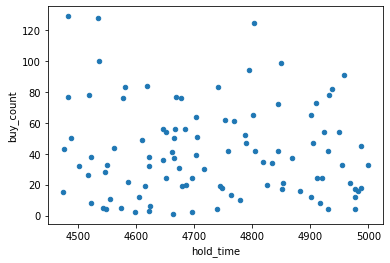

In [8]:
df_buyer_gr = df_buyer.groupby(["品种", "第一意向", "值"])

for it in df_buyer_gr:
    df = it[1]
    df = df.sort_values(by='平均持仓时间', ascending=False)
    data = df[["平均持仓时间", "购买货物数量"]].head(100)
    data = data.rename(columns={'平均持仓时间': 'hold_time', '购买货物数量': 'buy_count'})
    
    plt.figure(figsize=(100, 100))
    data.plot(x="hold_time", y="buy_count", kind="scatter")
    plt.show()
    
    break


In [9]:
df_buyer_gr = df_buyer.groupby(["品种", "第一意向", "值"]).agg({
    '购买货物数量': {'sum', 'count'}})
# df_buyer_gr.columns.get_level_values(1)
df_buyer_gr.sort_values(by=("购买货物数量", "sum"), ascending=False, inplace=True)
df_buyer_gr.head(20)

购买货物数量       
                 sum  count
品种 第一意向 值                  
CF 产地   新疆    728055  18045
SR 品牌   冷山    274555   4501
        绿原    272588   4499
        蝶花    271139   4532
        左江    271084   4463
        骏马    268087   4480
        中糖    262794   4402
   等级   1     165099   2745
   年度   2020  162380   2725
   等级   2     162107   2702
   年度   1920  160143   2701
CF 仓库   304   106326   2679
        325   104273   2596
        311   104093   2612
        313   103663   2581
        324   103358   2644
        301   103041   2544
   年度   2020   66750   1657
   产地   非新疆    64241   1619
   年度   1920   64175   1604

仓库:  112 货物种类:  750


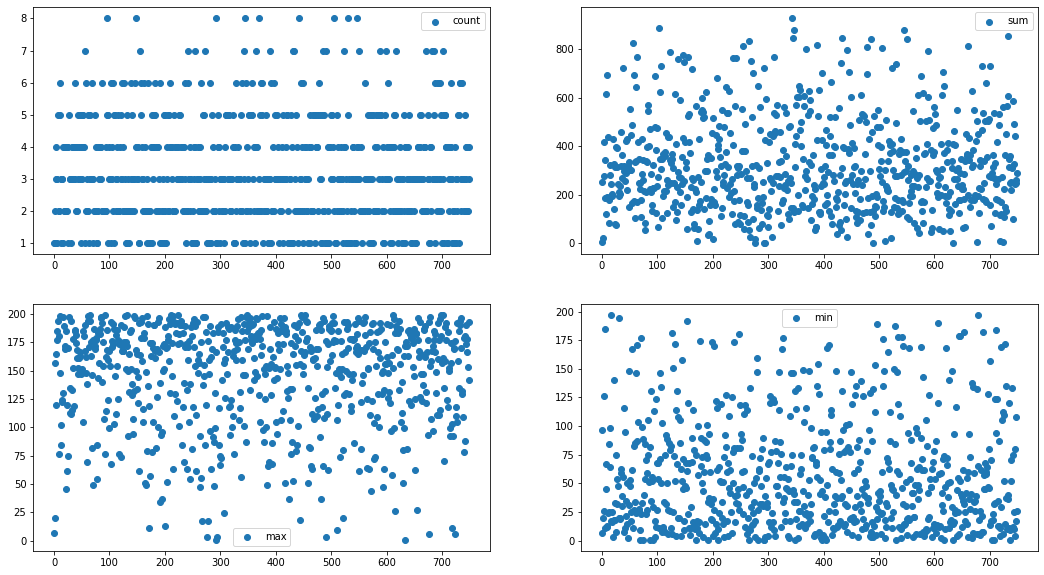

In [10]:
# df_seller_gr = df_seller.groupby(["货物编号"]).agg({'货物数量（张）': {'sum', 'count', 'max', 'min'}})
df_seller_gr = df_seller.groupby(["货物编号"]).count()
df_seller_gr1 = df_seller.groupby(['仓库'])


for it in df_seller_gr1:
    data = it[1].groupby(["货物编号"], as_index=False).agg(
        {'货物数量（张）': {'sum', 'count', 'max', 'min'}})

    data = data.rename(columns={'货物编号': 'good_id', '货物数量（张）': 'good_stock'})

    fig = plt.figure(figsize=(18, 10))

    print("仓库: ", it[0], "货物种类: ", data.shape[0])
    plt.subplot(221)
    plt.scatter(data.index.get_level_values(0).values,
                data[('good_stock', 'count')], label='count')
    plt.legend()

    plt.subplot(222)
    plt.scatter(data.index.get_level_values(0).values,
                data[('good_stock', 'sum')], label='sum')
    plt.legend()

    plt.subplot(223)
    plt.scatter(data.index.get_level_values(0).values,
                data[('good_stock', 'max')], label='max')
    plt.legend()

    plt.subplot(224)
    plt.scatter(data.index.get_level_values(0).values,
                data[('good_stock', 'min')], label='min')
    plt.legend()
    plt.show()
    break


In [11]:
df_result = pd.read_csv("./result.txt", header=0, low_memory=False)
df_result

,买方客户,卖方客户,品种,货物编号,仓库,分配货物数量,对应意向顺序
0,999800039610,999900002611,SR,SR2020011104468,441,1,0
1,999800049469,999900002611,SR,SR2020011104468,441,1,0
2,999800019666,999900048785,CF,CF2020011107111,333,1,0
3,999800049569,999900002611,SR,SR2020011104468,441,1,0
4,999800041142,999900002611,SR,SR2020011104468,441,1,0
...,...,...,...,...,...,...,...
516161,999800021459,999900032723,CF,CF2020011107702,313,4,1-2-3-5
516162,999800036957,999900032229,CF,CF2020011109253,303,9,1-2-3-4
516163,999800047092,999900031105,CF,CF2020011109065,305,4,1-2-4-5
516164,999800028952,999900033053,CF,CF2020011102781,309,8,1-2


In [12]:
df_score = pd.read_csv("./score.txt", header=0, names=["buyer", "score"], low_memory=False)

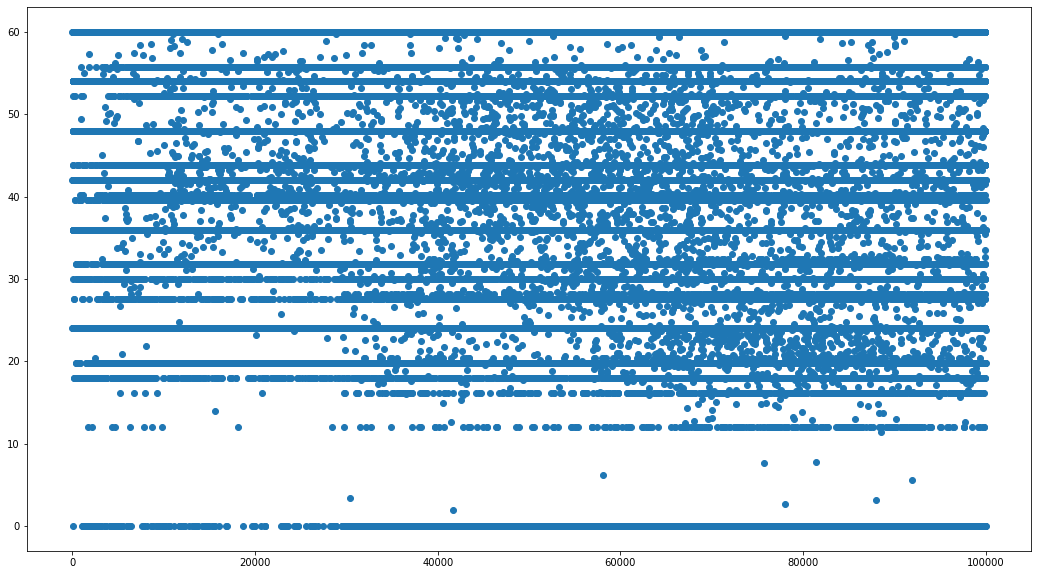

In [13]:
fig = plt.figure(figsize=(18, 10))
plt.scatter(df_score.index.get_level_values(0).values,
                df_score["score"], label='score')
plt.show()

In [14]:
df_score.sort_values(by="score", inplace=True)
df_score.head(10)

,buyer,score
64045,999800049663CF,0.0
38626,999800026045SR,0.0
87571,999800049993CF,0.0
87584,999800049390CF,0.0
69467,999800011610SR,0.0
59738,999800049511CF,0.0
69454,999800033380SR,0.0
87596,999800031528SR,0.0
87599,999800049589CF,0.0
87604,999800049307CF,0.0


In [15]:
df_buyer[df_buyer["买方客户"]=="999800046185"]

,买方客户,平均持仓时间,购买货物数量,品种,第一意向,值,第二意向,值.1,第三意向,值.2,第四意向,值.3,第五意向,值.4
46185,999800046185,1071,72,CF,仓库,325,产地,新疆,null,null,null,null,null,null
96185,999800046185,1365,14,SR,品牌,蝶花,等级,2,仓库,417,年度,2020,null,null
